In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score, rand_score

import os
os.environ["OMP_NUM_THREADS"] = '1'

## Pre-processing the data

### Loading the dataset

In [2]:
seed_df = pd.read_excel("seed_data.xlsx")
seed_df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [3]:
seed_df.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [4]:
seed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


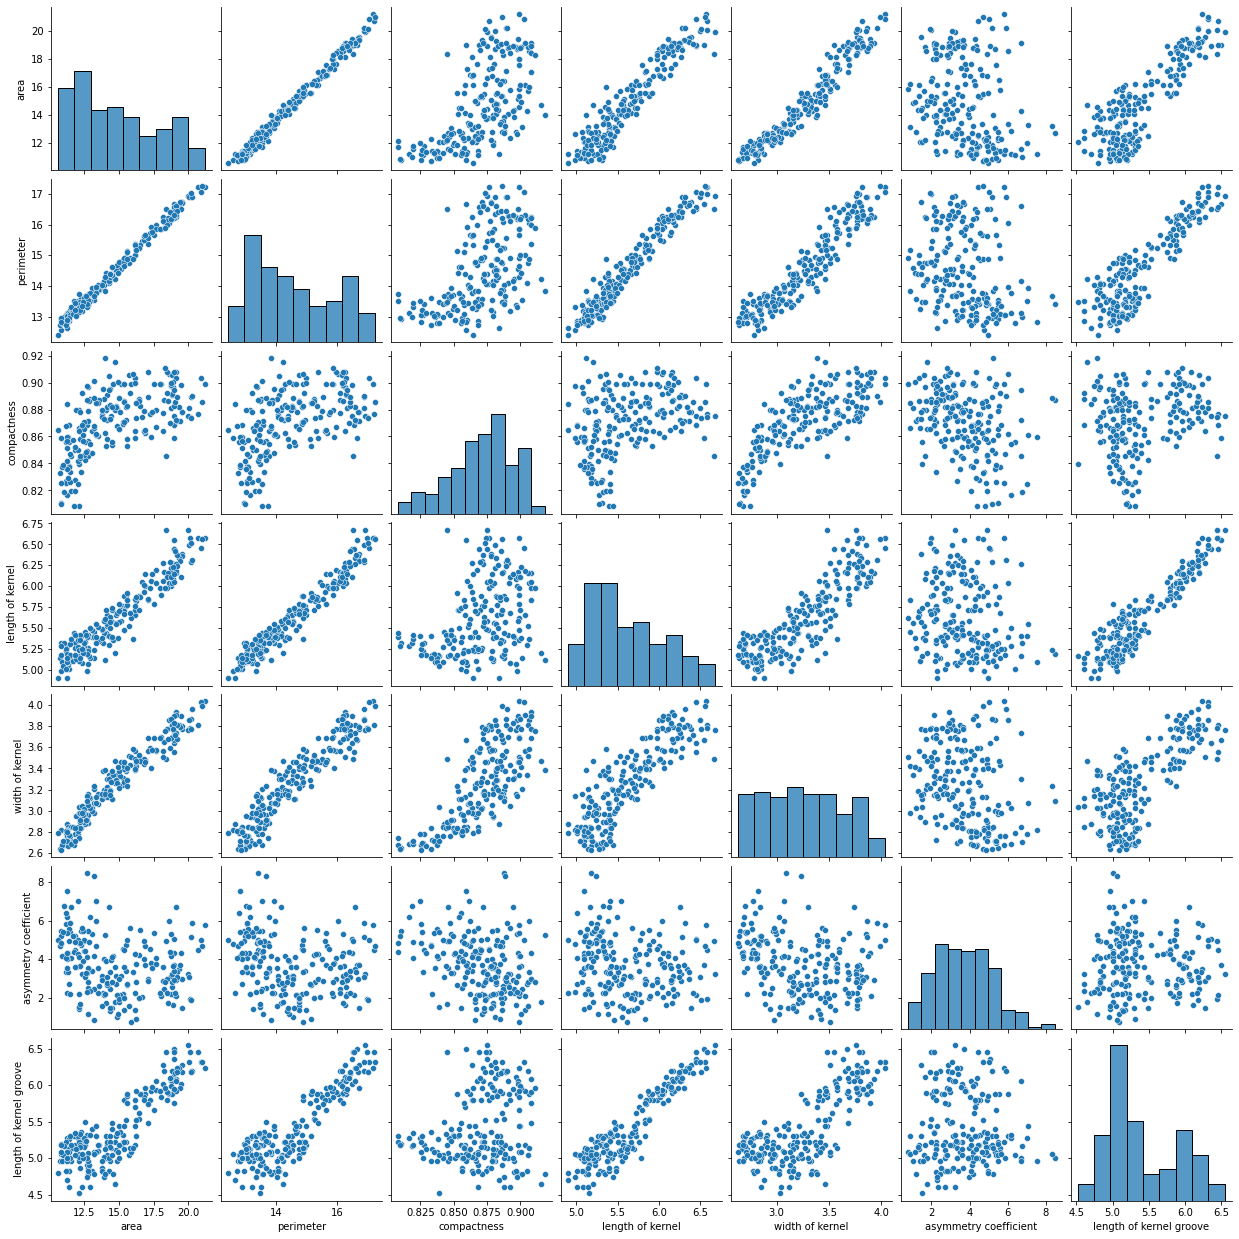

In [5]:
# Using pairplots for visualizing, with Scatterplots each pair of variables and Histogram for each variable

X = seed_df.iloc[:,:]
sns.pairplot(X)

In [6]:
# Checking for Missing values
seed_df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
dtype: int64

In [7]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [8]:
# Using PCA to reduce the dimentionality of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.71874303, 0.17108184, 0.09685763, 0.00976635])

In [9]:
# Checking for the original variance of the dimensions
sum(pca.explained_variance_ratio_)

0.99644884978806

### K-Means Clustering

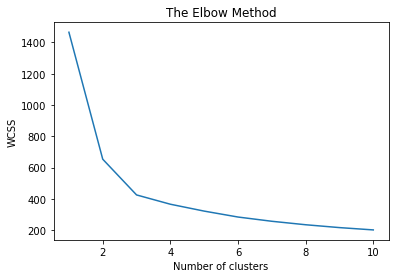

In [10]:
# Using the elbow method to assess the optimal number of clusters using K-means
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
    
# We then plot the resulting wcss using matplotlib
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Fitting K-Means to the dataset
# The elbow here appears to be at k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_reduced)

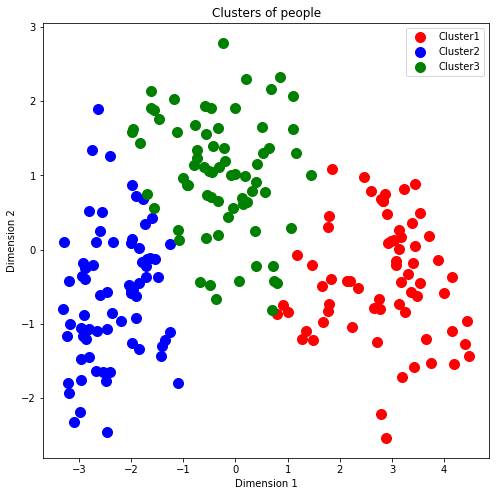

In [12]:
# Visualizing the K-Means clustering
colours = ['red','blue','green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans==i, 0], X_reduced[y_kmeans==i, 1], s=100, c=colours[i], label='Cluster'+str(i+1))
plt.title('Clusters of people')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [13]:
# To evaluate the result of the K-Means clustering

print("Silhouette Coefficient: %0.3f" % silhouette_score(X, y_kmeans, metric='euclidean'))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, y_kmeans))

Silhouette Coefficient: 0.401
Davies-Bouldin Index: 0.928


### Hierarchical Clustering

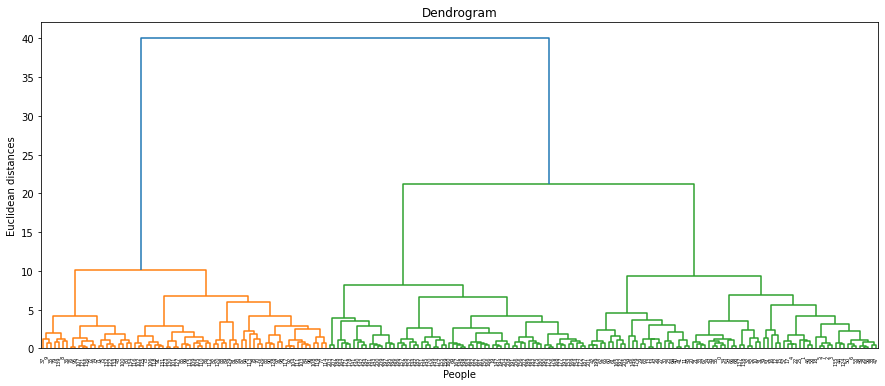

In [14]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method='ward'))
plt.title('Dendrogram')
plt.xlabel('People')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
# Fitting Hierarchical Clustering to the dataset
# Number of clusters is 3
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_reduced)

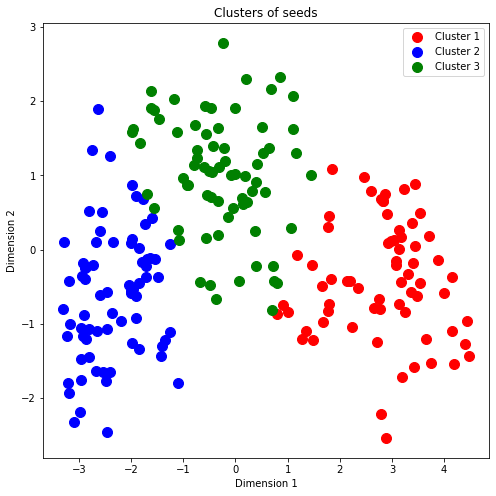

In [16]:
# Visualizing the Hierarchical clustering
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[y_kmeans==0,0], X_reduced[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X_reduced[y_kmeans==1,0], X_reduced[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_reduced[y_kmeans==2,0], X_reduced[y_kmeans==2,1], s=100, c='green', label='Cluster 3')

plt.title('Clusters of seeds')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [17]:
# To evaluate the result of the Hierarchical clustering

print("Silhouette Coefficient: %0.3f" % silhouette_score(X, y_hc))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, y_hc))

Silhouette Coefficient: 0.397
Davies-Bouldin Index: 0.940
